In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import CubicSpline

mi = 4*np.pi*1e-7 #permeabilidade magnetica do ar

#parametros para o caso real
H=np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500,2500,4000, 5000,9000, 12000,20000,25000])
B=np.array([0, 0.733, 1.205, 1.424, 1.517, 1.56, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.762, 1.770, 1.8, 1.816])

#parametros para o caso ideal
H_linear=np.array([0, 68])
B_linear=np.array([0, 0.733])

NumPontos = 100 # numero de pontos da função

H_real = CubicSpline(B,H, bc_type='natural') #H_real
H_linear = CubicSpline(B_linear,H_linear, bc_type='natural') #H_linear

angulos = np.array([-29.99, -20.0, -10.0, 0.0, 10.0, 20.0, 29.99])

#parametros do sistema
g = 0.45e-3 # comprimento do entreferro
R_r = 6.3e-2 # radio do rotor
D = 8e-2 # profundidade da sessão reta
N = 90 # numero de espiras
A_max = (R_r + g) * D * 30 * np.pi / 180 #area maxima quando alinhado
l_ferro = 20e-2 #area arbitrario para o comprimento do ferro
A_util = np.zeros(len(angulos))

for i in range(0, len(angulos)):
    A_util[i] = R_r * D * (30 - abs(angulos[i])) * np.pi / 180

I_real       = np.zeros(NumPontos)
I_ideal      = np.zeros(NumPontos)
Fluxo_conc   = np.zeros(NumPontos)
B_ar          = np.zeros(NumPontos)
B_fe           = np.zeros(NumPontos)


Questão 1: Apresente um gráfico do fluxo ocncatenado na bobina 1 em função da corrente aplicada nessa bobina considerando a posição do rotor variando da posição de -30 a 30 graus em passos de 10 graus.

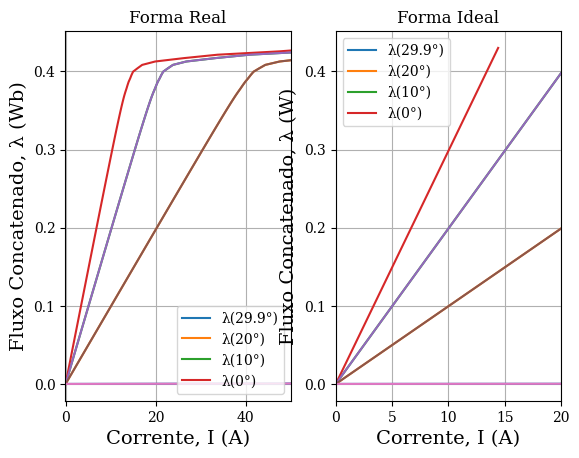

In [108]:
for i in range(0, len(A_util)):
    Area_proporcional = A_max/(A_util[i]) #proporcionalidade que deve ser mantida para que o fluxo entre o ar e o ferro seja igual
    for ponto in range(0, NumPontos):
        B_fe[ponto] = (1.816/NumPontos) * ponto # divide a curva de 0 a 1.816T em NumPontos segmentos e encontra o valor no ponto da iteração
        B_ar[ponto] = B_fe[ponto] * Area_proporcional # para menter o fluxo constante, a densidade do fluxo do ar aumenta de forma inversamente proporcional a area util
        Fluxo_conc[ponto] = N * A_max * B_fe[ponto] # fluxo concatenado = N * A * B
        I_real[ponto] = 1/N * ((B_ar[ponto]*2*g/mi) + H_real(B_fe[ponto])*l_ferro) # considerando o ferro e o entreferro
        I_ideal[ponto] = 1/N * (B_ar[ponto]*2*g/mi) #considerando apenas o entreferro com u -> infinito

    plt.subplot(1,2,1)
    plt.plot(I_real, Fluxo_conc)
    plt.xlim([-0.1,50])
    plt.legend(["λ(29.9°)", "λ(20°)", "λ(10°)", "λ(0°)"], loc = "best", prop={'size':10})
    plt.xlabel('Corrente, I (A)')
    plt.ylabel('Fluxo Concatenado, λ (Wb)')
    plt.title('Forma Real')
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.plot(I_ideal, Fluxo_conc)
    plt.xlim([-0.01,20])
    plt.legend(["λ(29.9°)", "λ(20°)", "λ(10°)", "λ(0°)"], loc = "best", prop={'size':10})
    plt.grid(True)
    plt.xlabel('Corrente, I (A)')
    plt.ylabel('Fluxo Concatenado, λ (W)')
    plt.title('Forma Ideal')


Questão 2: Determine qual deve ser a corrente aplicada na bobina de modo a obter uma densidade de fluxo de 1.8T quando o rotor estiver na posição zero graus

In [ ]:
# considerando que a o rotor esta em zero graus, a area util do entreferro é igual a area maxima, portanto Bf = Bar,
B_fixo = 1.8
I_real = (1/N) * ((2*g*B_fixo/mi) + (H_real(B_fixo)*l_ferro))
I_ideal = (1/N) * (2*g*B_fixo/mi)
print("valor da parte do ar = {:.3f}".format((2*g*B_fixo/mi)))
print("valor da parte do nucleo = {:.3f}".format((H_real(B_fixo)*l_ferro)))
print("Para o caso real, I = {:.3f}".format(I_real))
print("Para o caso real, I = {:.3f}".format(I_ideal))

valor da parte do ar = 1289.155
valor da parte do nucleo = 4000.000
Para o caso real, I = 58.768
Para o caso real, I = 14.324
